In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import os
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras import  Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16
from keras.models import load_model

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [9]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
NO_CLASSES = 10
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/Traffic/DATA',
                                                        target_size=(224,224),
                                                        color_mode='rgb',
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        shuffle=True)

Found 214 images belonging to 10 classes.


In [10]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))
x = model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

# final layer with softmax activation
preds = Dense(NO_CLASSES, activation='softmax')(x)
model = Model(model.input, preds)

# don't train the first 19 layers - 0-18 (Because VGG16 is a pretrained model and first 19 layers are pretrained to learn the features from images)
for layer in model.layers[:19]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model.layers[19:]:
    layer.trainable = True

In [11]:
model.compile(optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [12]:
model.fit(x=train_generator,
  batch_size = 1,
  verbose = 1,
  epochs = 20)


Epoch 1/20
7/7 [==============================] - 39s 5s/step - loss: 5.5820 - accuracy: 0.3131
Epoch 2/20
7/7 [==============================] - 1s 163ms/step - loss: 0.9417 - accuracy: 0.7150
Epoch 3/20
7/7 [==============================] - 1s 171ms/step - loss: 0.2644 - accuracy: 0.9112
Epoch 4/20
7/7 [==============================] - 1s 160ms/step - loss: 0.0646 - accuracy: 0.9953
Epoch 5/20
7/7 [==============================] - 1s 145ms/step - loss: 0.0237 - accuracy: 0.9953
Epoch 6/20
7/7 [==============================] - 1s 146ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 1s 148ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 8/20
7/7 [==============================] - 1s 152ms/step - loss: 7.3143e-04 - accuracy: 1.0000
Epoch 9/20
7/7 [==============================] - 1s 148ms/step - loss: 4.7436e-04 - accuracy: 1.0000
Epoch 10/20
7/7 [==============================] - 1s 147ms/step - loss: 3.5010e-04 - accuracy: 1.0000
Epoch 11/

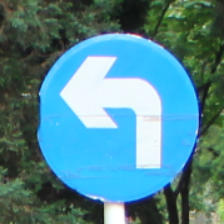

1/1 [==============================] - 0s 15ms/step
Predicted : Turn Left



In [22]:
class_dictionary = {0:'Caution',
              1:'Go Straight',
              2:'No Left Turn',
              3:'No Right Turn',
              4:'No U Turn',
              5:'Speed Limit 30',
              6:'Speed Limit 5',
              7:'Speed Limit 50',
              8:'Turn Left',
              9:'Turn Right'}
imgtest = cv2.imread('/content/drive/MyDrive/datasets/Traffic/TEST/022_0004.png',cv2.IMREAD_UNCHANGED)
size = (224, 224)
imgtest = cv2.resize(imgtest, size) 

# prepare the image for prediction
x = imgtest
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

 # making prediction
cv2_imshow(imgtest)
predicted_prob = model.predict(x)
# print(predicted_prob)
# print(predicted_prob[0].argmax())
print("Predicted : " + class_dictionary[predicted_prob[0].argmax()])
print("============================\n")